In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
from models.HH import *
from models.LIF import * 
from models.Ishikevich import *
from models.morrislecar import *
from utils.load import *
import matplotlib.animation as animation

In [2]:
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)


### 1 neuron HH test

$$     \left( \frac{dv}{dt} \right)_i = \frac{1}{C}\left[-g_{na}m^3h(V_i-E_{na} - g_kn^4(V_i - E_k) - g_l(V_i-E_l) + I_i  \right] $$
$$    + \frac{1}{C}\color{blue} \left[  -\kappa \sum_{i\neq j}^N (V_i-V_j) - s_{syn}(V_i-V_{rest})\right] $$
$$     \left( \frac{dm}{dt} \right)_i = \alpha_m(V_i,V_t) \cdot (1-m) - \beta_m(V_i,V_t) \cdot m $$
$$ \left( \frac{dn}{dt} \right)_i = \alpha_n(V_i,V_t) \cdot (1-n) - \beta_n(V_i,V_t) \cdot n $$
$$  \left( \frac{dh}{dt} \right)_i = \alpha_h(V_i,V_t) \cdot (1-h) - \beta_h(V_i,V_t) \cdot h $$

In [3]:
params_HH = load_HH()
#Initial conditions & the intensity
v0 = -65 
n0 = 0
m0 = 0
h0 = 0
y0 = [v0,n0,m0,h0]
Isyn = np.zeros(([2 , 2 ]))
I = [2.5, 0]
#variables related to the numerical integration of the problem
dt = 0.001
t_final = 300

data_HH, residue_HH = rk_Icst(dt,t_final,2,[v0,v0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Isyn,0,1)

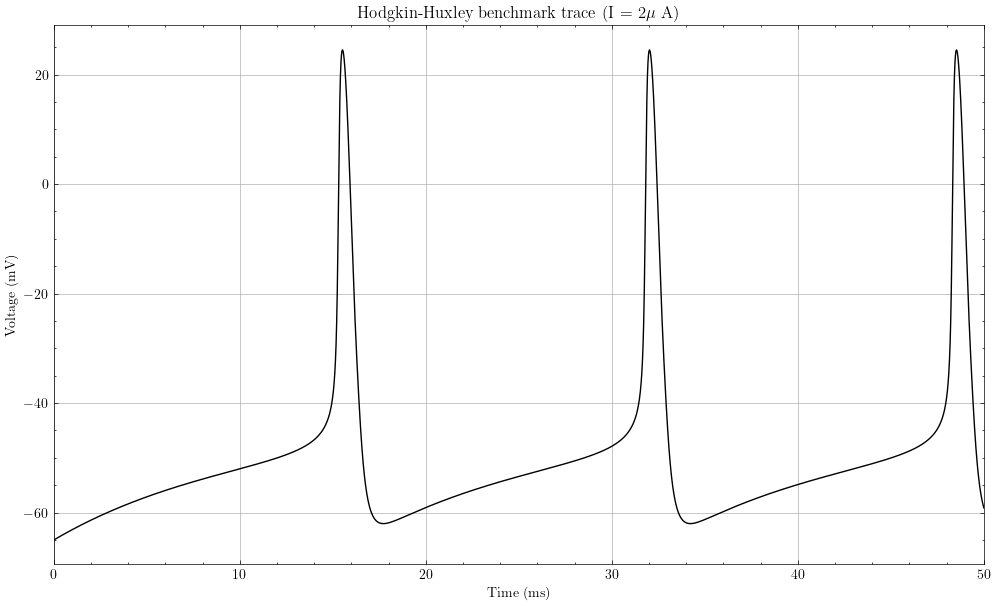

In [4]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,data_HH[:,0], color = 'black')
plt.title(r'Hodgkin-Huxley benchmark trace (I = 2$\mu$ A)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.xlim(0,50)
plt.grid()


Profiling with LIF

$$      \left( \frac{dv}{dt} \right)_i = \frac{1}{C} \left[ -g_l(V_i - E_l) + I_i \color{blue}  -\kappa \sum_{i\neq j}^N (V_i-V_j) - s_{syn}(V_i-V_{rest}) \color{white}\right] $$
$$     \text{if }  \ V_i \geq V_{th} \Rightarrow data_i \leftarrow w, \ V_i \leftarrow V_r $$


In [5]:
params_LIF = load_LIF()
#Initial conditions & the intensity
Isyn = np.zeros(([2 , 2 ]))
I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(0,int(t_final/dt)):
    I1[i,0] = 2.5
    I2[i,0] = 0
#variables related to the numerical integration of the problem
dt = 0.001
t_final = 300
y0 = [-65, -65]

data2aIF, completeIF_2a = rk_if(dt,t_final,2,y0,*params_LIF,I1,Isyn,0,1,1)

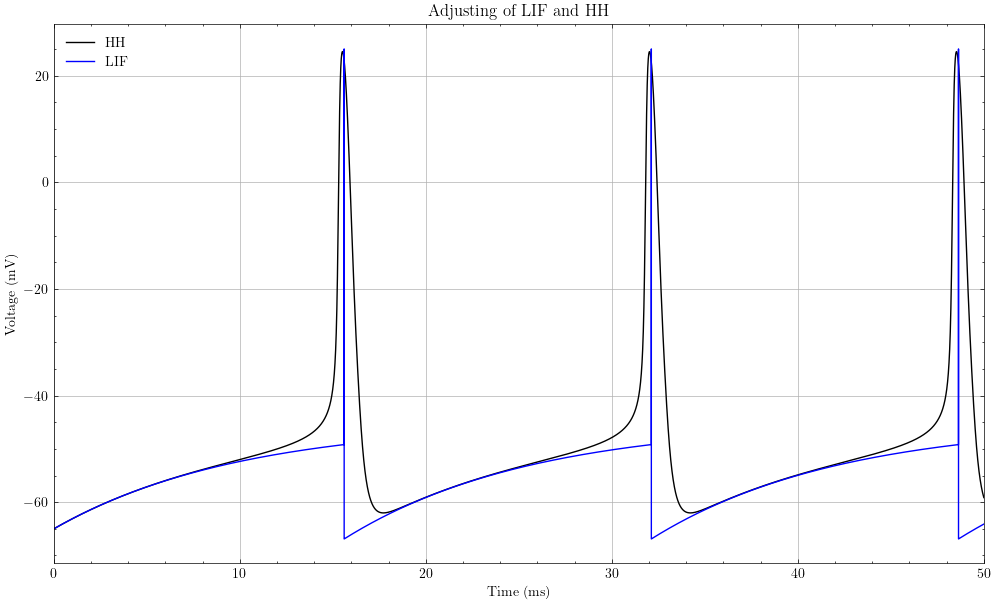

In [6]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,data_HH[:,0], color = 'black', label = 'HH')
plt.plot(time,data2aIF[:,0], color = 'blue', label = 'LIF')
plt.title(r'Adjusting of LIF and HH')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.xlim(0,50)
plt.grid()

### Profiling with Izhikevich

 $$ \left( \frac{dv}{dt} \right)_i = \frac{1}{C} \left[ k(V_i - V_r)(V_i - V_t) - u_i + I_i\right] $$
 $$     + \frac{1}{C}\color{blue} \left[  -\kappa \sum_{i\neq j}^N (V_i-V_j) - s_{syn}(V_i-V_{rest})\right] $$
 $$      \left( \frac{du}{dt} \right)_i = a \left[ b(V_i-V_r) - u_i \right] $$
 $$     \text{if } V_i \geq V_{peak}, \Rightarrow \ \ V_i \leftarrow c,  \ u_i \leftarrow u_i + d  $$

In [7]:
C = 100 # 1
vr = -60 
vt = -40 # -75
k_ish = 1 / 15
a = 0.03 
b = -2
c = -50
d = 100 # 5e-6
vpeak = 35 # 25
k_u = 1

Isyn = [[0, 0.0], [0.0, 0]]
Is = np.array(Isyn)
tau = 1
dt = 0.001
t_final = 300
I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(0,int(t_final/dt)):
    I1[i,0] = 70
    I2[i,0] = 0
order = 2
y0 = [-65,-65]
u0 = [0.0,0.0]

data2Ish, completeIsh1 = rk_ish(dt,t_final,order,y0,u0,I1,Is,C,vr,vt,k_ish,a,b,c,d,vpeak,k_u,0,tau)

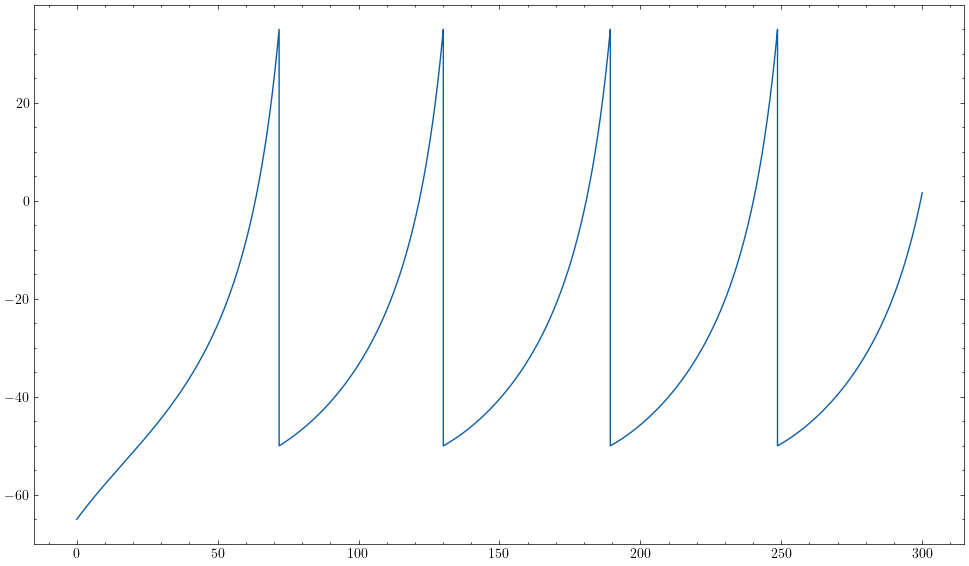

In [8]:
time = np.linspace(0,t_final,int(t_final/dt))
plt.plot(time,data2Ish[:,0])

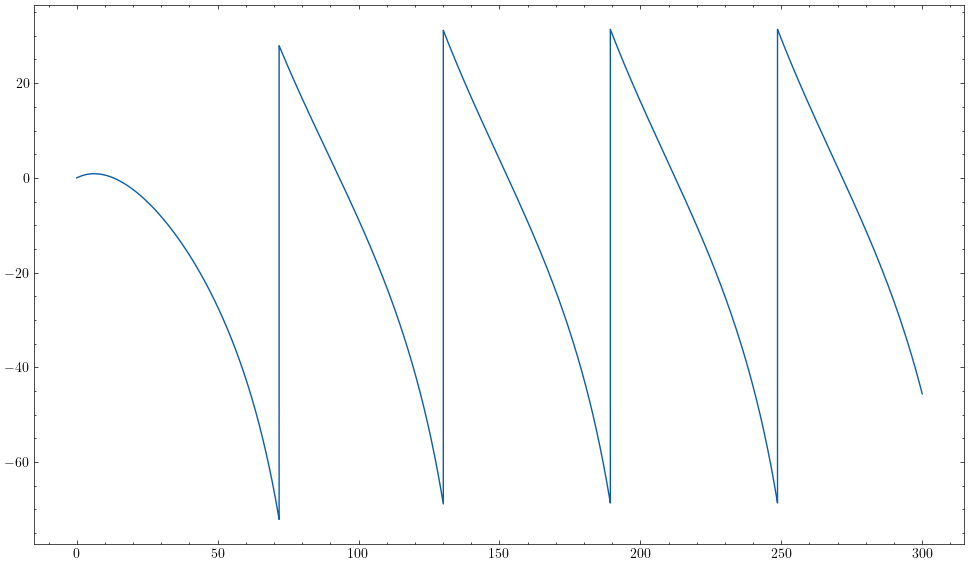

In [9]:
plt.plot(time,completeIsh1[:,1])

The other Izhikevich model:

 $$ \left( \frac{dv}{dt} \right)_i = \frac{1}{\tau_v} \left[ (V_i - V_m)(V_i - V_{rb}) - k_uu_i + RI_i\right] $$
 $$     + \frac{1}{C}\color{blue} \left[  -\kappa \sum_{i\neq j}^N (V_i-V_j) - s_{syn}(V_i-V_{rest})\right] $$
 $$      \left( \frac{du}{dt} \right)_i = \frac{1}{\tau_u} \left[ a(V_i-V_{rc}) - u_i \right] $$
 $$     \text{if } V_i \geq V_{thresholdFS}, \Rightarrow \ \ V_i \leftarrow v_{rest},  \ u_i \leftarrow u_i + b  $$

 


In [10]:
#Capacity
tau_v = 15 #to 55 ms
tau_u = 10 
R = 8
k_u = 10 
v_m = -75
v_rb = -60
v_rc = -64
v_reset = -47
v_thres = 25 
a = 1
b = 5 #pA

C = 1# 1
vr = -60 
vt = -75 # -75
k_ish = 1 / 15
a = 1 / 10 
b = 1
c = -47
d =  5
vpeak = 25 # 25
k_u = 10 / 15 


I_0 = 0.01 #pA
dt = 0.001
t_final = 300
Isyn = [[0, 0.0], [0.0, 0]]
Is = np.array(Isyn)
tau = 1

I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(0,int(t_final/dt)):
    I1[i,0] = I_0 * 1 / 15 / 10  
    I2[i,0] = 0
order = 2
y0 = [-65,-65]
u0 = [0.0,0.0]

data2Ish_model2, completeIsh1_model2= rk_ish(dt,t_final,order,y0,u0,I1,Is,C,vr,vt,k_ish,a,b,c,d,vpeak,k_u,0,tau)

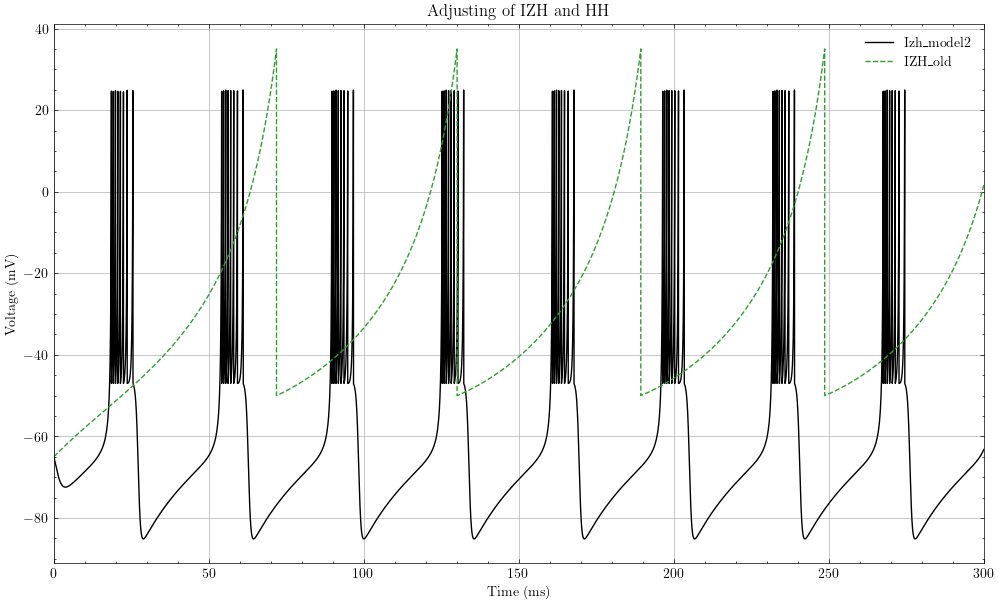

In [11]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,data2Ish_model2[:,0], color = 'black', label = 'Izh_model2')
plt.plot(time,data2Ish[:,0], '--', color = 'tab:green', label = 'IZH_old')
plt.title(r'Adjusting of IZH and HH')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.xlim(0,300)
plt.grid()

Modified parameters

In [12]:
#Capacity
C = 1

#Resting and threshold potentials
vr = -70 #-70
vt = -48.5
k_2 = 0.0
k_u = 0.06

k_ish = 0.019 #neuron's rheobase
c = -60 #-70#voltage reset value

a = 0.5 #recovery time constant
b = -1.3 #neuron's input resistance 
d = 100#total amount of outward minus inwards currents activating during the spike
vpeak = 25
dt = 0.001
t_final = 300
Isyn = [[0, 0.0], [0.0, 0]]
Is = np.array(Isyn)
tau = 1

I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(0,int(t_final/dt)):
    I1[i,0] = 2.5
    I2[i,0] = 0
order = 2
y0 = [-65,-65]
u0 = [0.0,0.0]

data2Ish_new, completeIsh1_new = rk_ish(dt,t_final,order,y0,u0,I1,Is,C,vr,vt,k_ish,a,b,c,d,vpeak,k_u,k_2,tau)

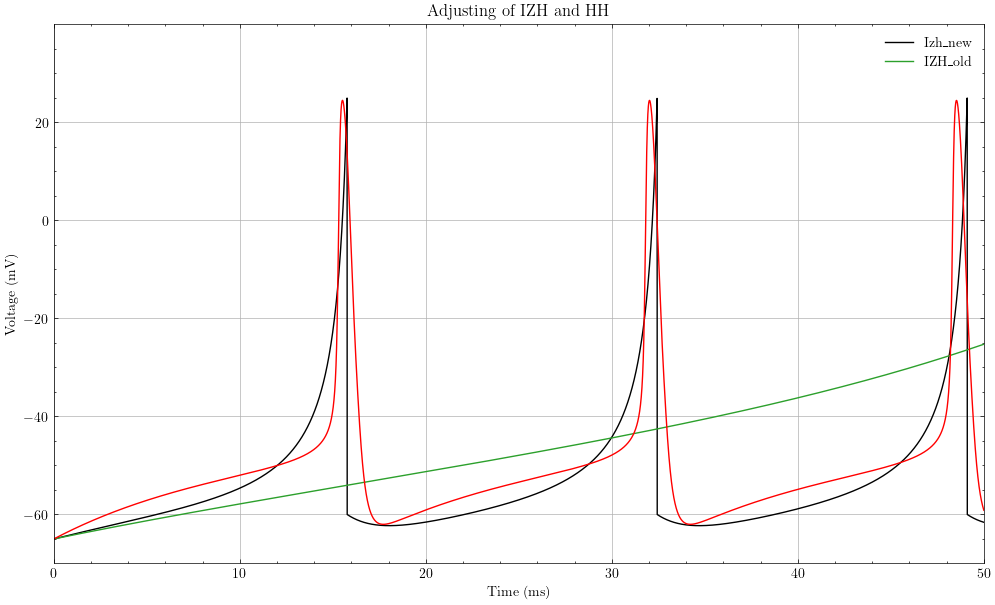

In [13]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,data2Ish_new[:,0], color = 'black', label = 'Izh_new')
plt.plot(time,data2Ish[:,0], color = 'tab:green', label = 'IZH_old')
plt.plot(time,data_HH[:,0], color = 'red')

plt.title(r'Adjusting of IZH and HH')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.xlim(0,50)
plt.grid()

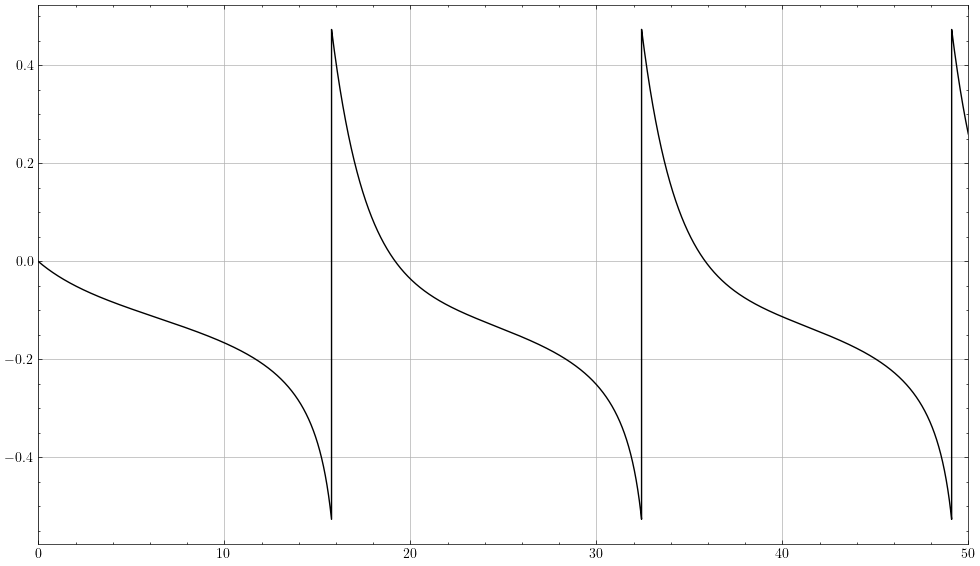

In [14]:
plt.plot(time,completeIsh1_new[:,1] / 100, color = 'black')
#plt.plot(time,completeIsh1[:,1]/100)
plt.xlim(0,50)
plt.grid()

In [15]:
#Capacity
C = 0.6

#Resting and threshold potentials
vr = -70
vt = -40.2
k_2 = 0.0

k_ish = 0.008 #neuron's rheobase
c = -63 #voltage reset value

a = 0.00403 #recovery time constant
b = -0.204 #neuron's input resistance 
d = 0.3#total amount of outward minus inwards currents activating during the spike
vpeak = 25
dt = 0.001
t_final = 100
Isyn = [[0, 0.0], [0.0, 0]]
Is = np.array(Isyn)
tau = 1

I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(0,int(t_final/dt)):
    I1[i,0] = 2.5
    I2[i,0] = 0
order = 2
y0 = [-65,-65]
u0 = [0.0,0.0]

data2Ish, completeIsh1 = rk_ish(dt,t_final,order,y0,u0,I1,Is,C,vr,vt,k_ish,a,b,c,d,vpeak,k_2,tau)

TypeError: rk_ish() missing 1 required positional argument: 'tau'

#### Profiling with ML

$$ \left( \frac{dv}{dt} \right)_i = \frac{1}{C} \left[ -I_{ion} -\kappa \sum_{i\neq j}^N (V_i-V_j)  + I_i \color{blue}   - s_{syn}(V_i-V_{rest}) \color{white}\right] $$
$$     I_{ion} (t) = g_{Na}m_{\infty}(V_{i})(V_i-E_{Na}) + g_kw(V_i)(V_i-E_k) + g_{shunt}(V_i-E_{shunt}) $$
$$      \left( \frac{dw}{dt} \right)_i = \varphi (w_{\infty}(V_i) - w_i)\cosh{\left(\frac{V_i - V_3}{2V_4}\right)} $$
$$     m_{\infty}(V_i) = \frac{1}{2}\left(1 + \tanh{\left(\frac{V_i-V_1}{V_2}\right)}\right) $$
$$     w_{\infty}(V_i) = \frac{1}{2}\left(1 + \tanh{\left(\frac{V_i-V_3}{V_4}\right)}\right)$$




Original

In [15]:
Ena = 50 
Ek = -100 
Eshunt = -65
V1 = -1.2
V2 = 23
V3 = -2
V4 = 21
gna = 10
gk = 10
gshunt = 1.2 
C = 1
psi = 0.15



k = 0.00
dt = 0.001
t_final = 300
Isyn = [[0, 0.0], [0.0, 0]]
Is = np.array(Isyn)
tau = 1

I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(0,int(t_final/dt)):
    I1[i,0] = 18
    I2[i,0] = 0
order = 2
y0 = [-65 , -65]
w0 = [0.00, 0.00]

data2aML, completeML = rk_ml(dt,t_final,2,y0,w0,psi,V1,V2,V3,V4,gna,gk,gshunt,Ena,Ek,Eshunt,C,I1,Is,k,tau)

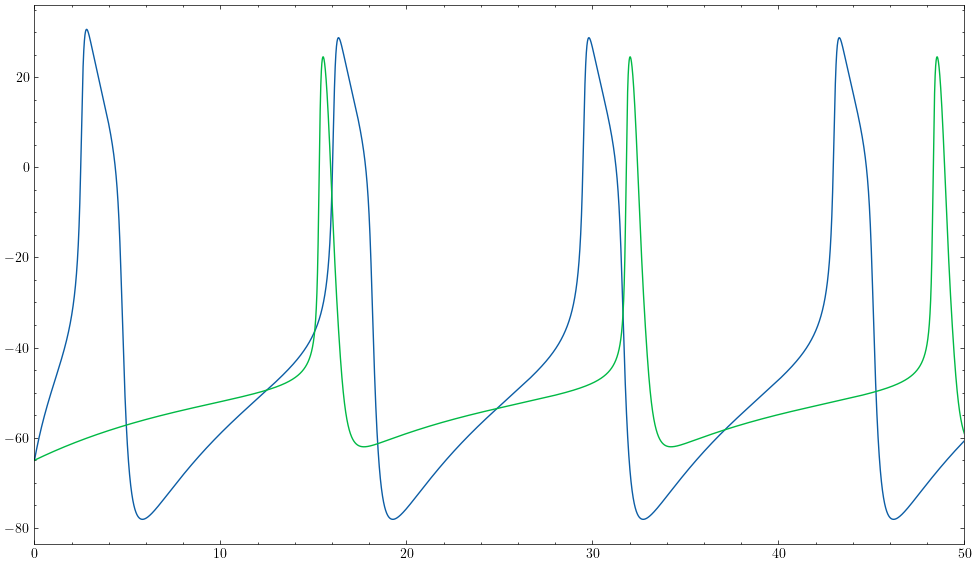

In [16]:
time = np.linspace(0,t_final,int(t_final/dt),)

plt.xlim(0,50)
plt.plot(time,data2aML[:,0])
plt.plot(time,data_HH[:,0])

$$ \left( \frac{dv}{dt} \right)_i = \frac{1}{C} \left[ -I_{ion} -\kappa \sum_{i\neq j}^N (V_i-V_j)  + I_i \color{blue}   - s_{syn}(V_i-V_{rest}) \color{white}\right] $$
$$     I_{ion} (t) = g_{Na}m_{\infty}(V_{i})(V_i-E_{Na}) + g_kw(V_i)(V_i-E_k) + g_{shunt}(V_i-E_{shunt}) $$
$$      \left( \frac{dw}{dt} \right)_i = \varphi (w_{\infty}(V_i) - w_i)\cosh{\left(\frac{V_i - V_3}{2V_4}\right)} $$
$$     m_{\infty}(V_i) = \frac{1}{2}\left(1 + \tanh{\left(\frac{V_i-V_1}{V_2}\right)}\right) $$
$$     w_{\infty}(V_i) = \frac{1}{2}\left(1 + \tanh{\left(\frac{V_i-V_3}{V_4}\right)}\right)$$




In [17]:
def mg(v):
    v1 = 1.2
    V2 = 23
    return 0.5 * (1 + np.tanh( (v-v1) /V2 )) * gna

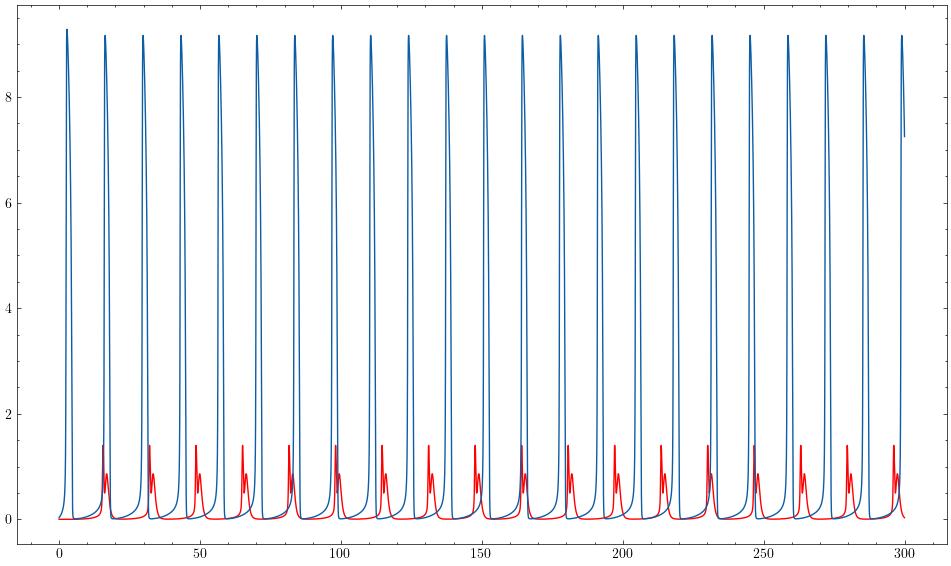

In [18]:
plt.plot(time,residue_HH[:,1]**3 * residue_HH[:,3] * 30, color = 'red')
plt.plot(time,mg(data2aML[:,0]))

Modified

In [337]:
Ena = 90
Ek = -110
Eshunt = -75

V1 = -3
V2 = 20
V3 = -3
V4 = 19


gna = 2 # 1.39
gk = 2 #1.39
gshunt = 0.085#1/6 

C = 1
psi = 0.93



k = 0.00
dt = 0.001
t_final = 300
Isyn = [[0, 0.0], [0.0, 0]]
Is = np.array(Isyn)
tau = 1

I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(0,int(t_final/dt)):
    I1[i,0] = 2.5
    I2[i,0] = 0
order = 2
y0 = [-65 , -65]
w0 = [0.00, 0.00]

data2aML, completeML = rk_ml(dt,t_final,2,y0,w0,psi,V1,V2,V3,V4,gna,gk,gshunt,Ena,Ek,Eshunt,C,I1,Is,k,tau)

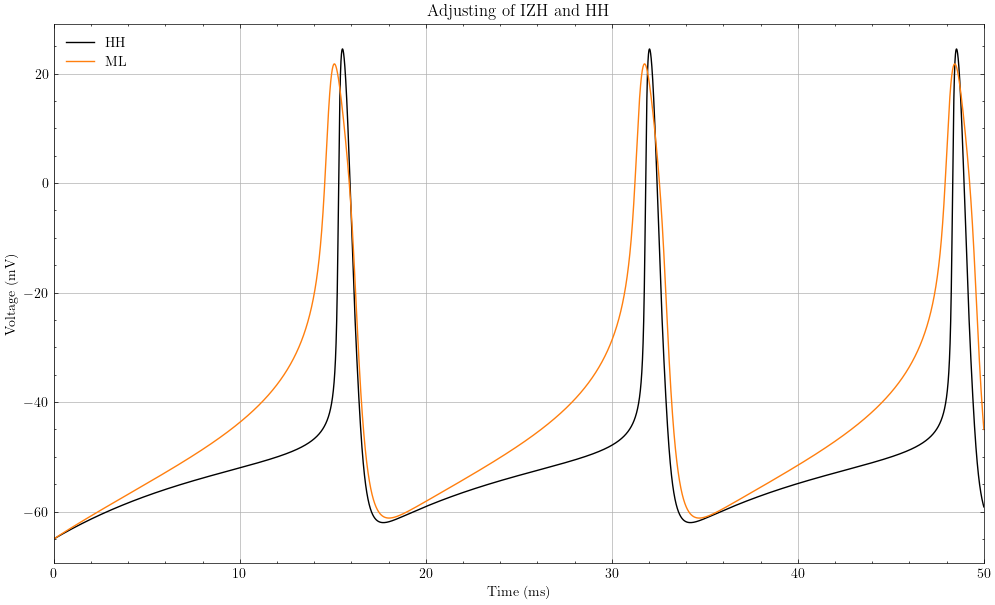

In [338]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,data_HH[:,0], color = 'black', label = 'HH')
plt.plot(time,data2aML[:,0], color = 'tab:orange', label = 'ML')
plt.title(r'Adjusting of IZH and HH')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.xlim(0,50)
plt.grid()

In [339]:
def mg(v):
    v1 = 1.2
    V2 = 23
    return 0.5 * (1 + np.tanh( (v-v1) /V2 )) * gna

(0.0, 50.0)

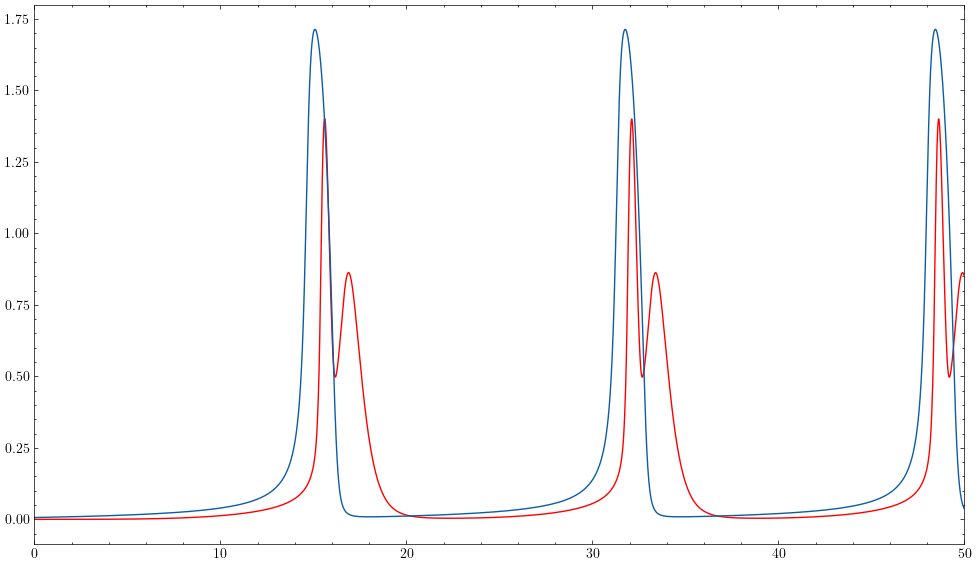

In [340]:
plt.plot(time,residue_HH[:,1]**3 * residue_HH[:,3] * 30, color = 'red')
plt.plot(time,mg(data2aML[:,0]))
plt.xlim(0,50)

(0.0, 50.0)

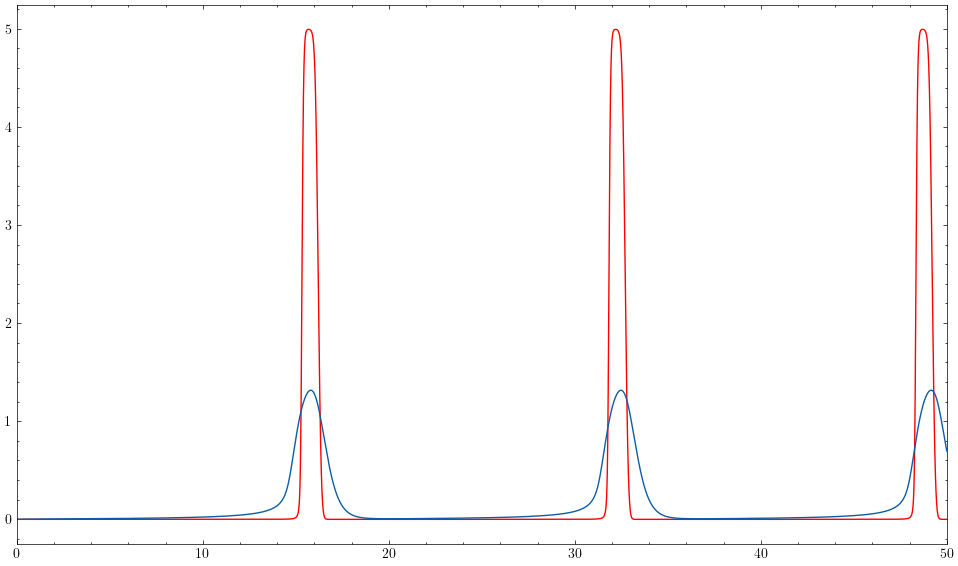

In [341]:
plt.plot(time,residue_HH[:,2]**4 * 5, color = 'red')
plt.plot(time,completeML[:,1]*gk)
plt.xlim(0,50)